In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
!dir

 Volume in drive E is New Volume
 Volume Serial Number is 9234-41FB

 Directory of E:\KPMG-Internship(virtual)\notebooks

22-12-2021  07:40 PM    <DIR>          .
22-12-2021  07:40 PM    <DIR>          ..
22-12-2021  08:50 AM    <DIR>          .ipynb_checkpoints
22-12-2021  11:23 AM           158,347 KPMG-task1.ipynb
22-12-2021  07:40 PM            11,642 KPMG-task2.ipynb
               2 File(s)        169,989 bytes
               3 Dir(s)  311,812,685,824 bytes free


In [9]:
cd ..

E:\KPMG-Internship(virtual)


In [18]:
transaction = pd.read_csv('datasets/transaction_updated.csv')
customerList = pd.read_csv('datasets/CustomerList_updated.csv')
CustomerDemographic = pd.read_csv('datasets/CustomerDemographic_updated.csv')
CustomerAddress = pd.read_csv('datasets/CustomerAddress_updated.csv')

In [19]:
transaction

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,3,3120,2017-05-21,True,Approved,Trek,Standard,medium,large,2091.47,388.92,41701.0
2,37,402,2017-10-16,False,Approved,OHM,Standard,low,medium,1793.43,248.82,36361.0
3,88,3135,2017-08-31,False,Approved,Norco,Standard,medium,medium,1198.46,381.10,36145.0
4,78,787,2017-01-10,True,Approved,Giant,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19798,51,1018,2017-06-24,True,Approved,OHM,Standard,high,medium,2005.66,1203.40,37823.0
19799,41,127,2017-09-11,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19800,87,2284,2017-04-14,True,Approved,OHM,Standard,medium,medium,1636.90,44.71,40410.0
19801,6,2764,2017-03-07,False,Approved,OHM,Standard,high,medium,227.88,136.73,38216.0


In [ ]:
take yearly frequency of sales, then take monthly basis frequency and find the season sale
take canceled order status, then give the untrustworthy brand to buy
brand vs product size - brand diverse or targeted
brand vs 

In [23]:
def viewCategory(table_name,col_name_lst):
    for col_name in col_name_lst:
        print(table_name[col_name].value_counts())
        print('')

In [24]:
category_list = transaction.dtypes[transaction.dtypes == 'object'].index.tolist()
viewCategory(transaction,category_list)

2017-08-18    82
2017-02-14    81
2017-10-15    74
2017-01-31    72
2017-12-19    70
              ..
2017-06-14    38
2017-07-12    37
2017-03-29    35
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

True       9739
False      9706
unknown     358
Name: online_order, dtype: int64

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

Solex       4253
Giant       3312
WeareA2B    3295
OHM         3043
Trek        2990
Norco       2910
Name: brand, dtype: int64

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64



In [101]:
df = transaction.groupby(['product_size', 'brand']).size().reset_index().pivot(columns='product_size', index='brand', values=0)
df.reset_index(['brand'],inplace=True)
df

product_size,brand,large,medium,small
0,Giant,949,1776,587
1,Norco,410,1736,764
2,OHM,195,2648,200
3,Solex,1091,2977,185
4,Trek,901,1542,547
5,WeareA2B,430,2311,554


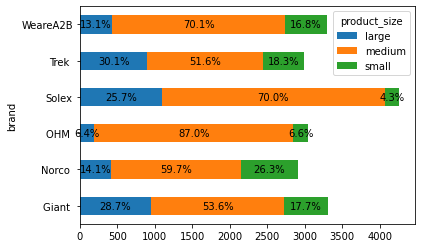

In [102]:
df.plot(x = 'brand',kind='barh', stacked=True, mark_right = True)
df_total = df["large"] + df["medium"] + df["small"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

In [20]:
customerList

,customer_name,age,gender,related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,Rank,Value,residential_address,postcode,state
0,Chickie-Brister,64,Male,86,General Manager,Manufacturing,Mass Customer,Yes,14,6,1,1.719,45 Shopko Center,4500,QLD
1,Morly-Genery,51,Male,69,Structural Engineer,Property,Mass Customer,No,16,11,1,1.719,14 Mccormick Park,2113,NSW
2,Ardelis-Forrester,47,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5,1,1.719,5 Colorado Crossing,3505,VIC
3,Lucine-Stutt,42,Female,64,Account Representative III,Manufacturing,Affluent Customer,Yes,5,1,4,1.703,207 Annamark Plaza,4814,QLD
4,Melinda-Hadlee,56,Female,34,Financial Analyst,Financial Services,Affluent Customer,No,19,9,4,1.703,115 Montana Place,2093,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Ferdinand-Romanetti,62,Male,60,Paralegal,Financial Services,Affluent Customer,No,9,7,996,0.374,2 Sloan Way,2200,NSW
711,Burk-Wortley,20,Male,22,Senior Sales Associate,Health,Mass Customer,No,6,10,997,0.357,04 Union Crossing,2196,NSW
712,Melloney-Temby,67,Female,17,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,Yes,15,2,997,0.357,33475 Fair Oaks Junction,4702,QLD
713,Dickie-Cubbini,69,Male,30,Financial Advisor,Financial Services,Mass Customer,Yes,19,2,997,0.357,57666 Victoria Way,4215,QLD


In [21]:
CustomerDemographic

,customer_id,customer_name,age,gender,related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine-Medendorp,68,Female,93,Executive Secretary,Health,Mass Customer,Yes,11
1,2,Eli-Bockman,41,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16
2,3,Arlin-Dearle,67,Male,61,Recruiting Manager,Property,Mass Customer,Yes,15
3,9,Mala-Lind,48,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8
4,10,Fiorenze-Birdall,33,Female,49,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20
...,...,...,...,...,...,...,...,...,...,...
2773,3993,Andi-Dumelow,47,Female,6,Librarian,Entertainment,Mass Customer,No,10
2774,3994,Stephie-Byars,32,Female,5,Structural Analysis Engineer,Manufacturing,Affluent Customer,No,12
2775,3995,Rusty-Iapico,46,Male,93,Staff Scientist,Manufacturing,Mass Customer,Yes,14
2776,3996,Rosalia-Halgarth,46,Female,8,VP Product Management,Health,Mass Customer,No,19


In [22]:
CustomerAddress

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9
...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,3
3995,4000,57042 Village Green Point,4511,QLD,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,10
3997,4002,8194 Lien Street,4032,QLD,7
